<a href="https://colab.research.google.com/github/sergioarnold87/PI03_Analytics/blob/main/PI_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nos conectamos con el drive

In [232]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importamos las librerias

In [233]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# Cargamos el dataset

In [234]:
df = pd.read_csv('/content/drive/MyDrive/PI03-Analytics/AccidentesAviones.csv')

In [235]:
df.head()

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...


In [236]:
# Vemos el tipo de datos de cada columna
df.dtypes

Unnamed: 0                 int64
fecha                     object
HORA declarada            object
Ruta                      object
OperadOR                  object
flight_no                 object
route                     object
ac_type                   object
registration              object
cn_ln                     object
all_aboard                object
PASAJEROS A BORDO         object
crew_aboard               object
cantidad de fallecidos    object
passenger_fatalities      object
crew_fatalities           object
ground                    object
summary                   object
dtype: object

In [237]:
# Controlamos si hay valores nulos
df.isna().sum()

Unnamed: 0                0
fecha                     0
HORA declarada            0
Ruta                      0
OperadOR                  0
flight_no                 0
route                     0
ac_type                   0
registration              0
cn_ln                     0
all_aboard                0
PASAJEROS A BORDO         0
crew_aboard               0
cantidad de fallecidos    0
passenger_fatalities      0
crew_fatalities           0
ground                    0
summary                   0
dtype: int64

# Realizamos algunas transformaciones al DataFrame

In [238]:
# Caambiamos el valor "?", por "0" 
df= df.replace({"?": "0"})

In [239]:
df['cantidad de fallecidos'] = df['cantidad de fallecidos'].astype('float')

In [240]:
df['all_aboard'] = df['all_aboard'].astype('float64')

In [241]:
df['crew_aboard'] = df['crew_aboard'].astype('float64')
df['passenger_fatalities'] = df['passenger_fatalities'].astype('float64')
df['crew_fatalities'] = df['crew_fatalities'].astype('float64')

In [242]:
df['PASAJEROS A BORDO'] = df['PASAJEROS A BORDO'].astype('float64')

In [243]:
# Agrupamos los accidentes por decada
df['anio'] = pd.DatetimeIndex(df['fecha']).year
bins = [1900,1919,1939,1959,1979,1999,2009,2019]
group_names = ["1900-1920", "1920-1940", "1940-1960", "1960-1980","1980-2000", "2000-2020", ">2020's"]
df['Decadas'] = pd.cut(df['anio'], bins, labels=group_names, include_lowest=True)
df.head(25)

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary,anio,Decadas
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,0,Demonstration,Wright Flyer III,0,1,2.0,1.0,1.0,1.0,1.0,0.0,0,"During a demonstration flight, a U.S. Army fly...",1908,1900-1920
1,1,"September 07, 1909",0,"Juvisy-sur-Orge, France",0,0,Air show,Wright Byplane,SC1,0,1.0,0.0,1.0,1.0,0.0,0.0,0,Eugene Lefebvre was the first pilot to ever be...,1909,1900-1920
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,0,Test flight,Dirigible,0,0,5.0,0.0,5.0,5.0,0.0,5.0,0,First U.S. dirigible Akron exploded just offsh...,1912,1900-1920
3,3,"August 06, 1913",0,"Victoria, British Columbia, Canada",Private,0,0,Curtiss seaplane,0,0,1.0,0.0,1.0,1.0,0.0,1.0,0,The first fatal airplane accident in Canada oc...,1913,1900-1920
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,0,0,Zeppelin L-1 (airship),0,0,20.0,0.0,0.0,14.0,0.0,0.0,0,The airship flew into a thunderstorm and encou...,1913,1900-1920
5,5,"October 17, 1913",1030,"Near Johannisthal, Germany",Military - German Navy,0,0,Zeppelin L-2 (airship),0,0,28.0,0.0,0.0,28.0,0.0,0.0,0,Hydrogen gas which was being vented was sucked...,1913,1900-1920
6,6,"March 05, 1915",0100,"Tienen, Belgium",Military - German Navy,0,0,Zeppelin L-8 (airship),0,0,41.0,0.0,41.0,17.0,0.0,17.0,0,Crashed into trees while attempting to land af...,1915,1900-1920
7,7,"September 03, 1915",1520,"Off Cuxhaven, Germany",Military - German Navy,0,0,Zeppelin L-10 (airship),0,0,19.0,0.0,0.0,19.0,0.0,0.0,0,"Exploded and burned near Neuwerk Island, when...",1915,1900-1920
8,8,"July 28, 1916",0,"Near Jambol, Bulgeria",Military - German Army,0,0,Schutte-Lanz S-L-10 (airship),0,0,20.0,0.0,0.0,20.0,0.0,0.0,0,"Crashed near the Black Sea, cause unknown.",1916,1900-1920
9,9,"September 24, 1916",0100,"Billericay, England",Military - German Navy,0,0,Zeppelin L-32 (airship),0,0,22.0,0.0,0.0,22.0,0.0,0.0,0,Shot down by British aircraft crashing in flames.,1916,1900-1920


In [244]:
df.describe()

,Unnamed: 0,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,anio
count,5008.000000,5008.000000,5008.000000,5008.000000,5008.000000,5008.000000,5008.000000,5008.000000
mean,2503.500000,31.015575,25.691294,4.321885,22.258387,18.051917,3.418930,1970.851637
std,1445.829404,45.438768,43.405075,3.789422,34.983747,33.496574,3.193296,24.703696
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1908.000000
25%,1251.750000,6.000000,2.000000,2.000000,4.000000,0.000000,1.000000,1951.000000
50%,2503.500000,16.000000,11.000000,3.000000,11.000000,7.000000,3.000000,1970.000000
75%,3755.250000,34.250000,29.000000,6.000000,25.000000,20.000000,5.000000,1992.000000
max,5007.000000,644.000000,614.000000,83.000000,583.000000,560.000000,43.000000,2021.000000


In [245]:
df["fecha"] = pd.to_datetime(df["fecha"])
df.head(3)

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary,anio,Decadas
0,0,1908-09-17,1718,"Fort Myer, Virginia",Military - U.S. Army,0,Demonstration,Wright Flyer III,0,1,2.0,1.0,1.0,1.0,1.0,0.0,0,"During a demonstration flight, a U.S. Army fly...",1908,1900-1920
1,1,1909-09-07,0,"Juvisy-sur-Orge, France",0,0,Air show,Wright Byplane,SC1,0,1.0,0.0,1.0,1.0,0.0,0.0,0,Eugene Lefebvre was the first pilot to ever be...,1909,1900-1920
2,2,1912-07-12,0630,"Atlantic City, New Jersey",Military - U.S. Navy,0,Test flight,Dirigible,0,0,5.0,0.0,5.0,5.0,0.0,5.0,0,First U.S. dirigible Akron exploded just offsh...,1912,1900-1920


In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Unnamed: 0              5008 non-null   int64         
 1   fecha                   5008 non-null   datetime64[ns]
 2   HORA declarada          5008 non-null   object        
 3   Ruta                    5008 non-null   object        
 4   OperadOR                5008 non-null   object        
 5   flight_no               5008 non-null   object        
 6   route                   5008 non-null   object        
 7   ac_type                 5008 non-null   object        
 8   registration            5008 non-null   object        
 9   cn_ln                   5008 non-null   object        
 10  all_aboard              5008 non-null   float64       
 11  PASAJEROS A BORDO       5008 non-null   float64       
 12  crew_aboard             5008 non-null   float64 

In [247]:
df = df.rename(columns={df.columns[1]: 'fecha', df.columns[2]: 'hora',
                        df.columns[3]: 'ruta', df.columns[4]: 'operador',
                        df.columns[5]: 'vuelo_nro', df.columns[6]: 'recorrido',
                        df.columns[7]: 'tipo_avion', df.columns[8]: 'registro',
                        df.columns[10]: 'total_a_bordo', df.columns[11]: 'pasajeros_a_bordo',
                        df.columns[12]: 'tripulacion_a_bordo', df.columns[13]: 'total_fallecidos',
                        df.columns[14]: 'pasajeros_fallecidos', df.columns[15]: 'tripulacion_fallecidos',
                        df.columns[16]: 'fallecidos_en_tierra', df.columns[17]: 'resumen'
                        })


In [248]:
df = df.drop(columns=['Unnamed: 0'])

In [249]:
df = df.drop(columns=['cn_ln'])

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   fecha                   5008 non-null   datetime64[ns]
 1   hora                    5008 non-null   object        
 2   ruta                    5008 non-null   object        
 3   operador                5008 non-null   object        
 4   vuelo_nro               5008 non-null   object        
 5   recorrido               5008 non-null   object        
 6   tipo_avion              5008 non-null   object        
 7   registro                5008 non-null   object        
 8   total_a_bordo           5008 non-null   float64       
 9   pasajeros_a_bordo       5008 non-null   float64       
 10  tripulacion_a_bordo     5008 non-null   float64       
 11  total_fallecidos        5008 non-null   float64       
 12  pasajeros_fallecidos    5008 non-null   float64 

In [251]:
df_limpio = df.copy()

In [252]:
df_limpio

,fecha,hora,ruta,operador,vuelo_nro,recorrido,tipo_avion,registro,total_a_bordo,pasajeros_a_bordo,tripulacion_a_bordo,total_fallecidos,pasajeros_fallecidos,tripulacion_fallecidos,fallecidos_en_tierra,resumen,anio,Decadas
0,1908-09-17,1718,"Fort Myer, Virginia",Military - U.S. Army,0,Demonstration,Wright Flyer III,0,2.0,1.0,1.0,1.0,1.0,0.0,0,"During a demonstration flight, a U.S. Army fly...",1908,1900-1920
1,1909-09-07,0,"Juvisy-sur-Orge, France",0,0,Air show,Wright Byplane,SC1,1.0,0.0,1.0,1.0,0.0,0.0,0,Eugene Lefebvre was the first pilot to ever be...,1909,1900-1920
2,1912-07-12,0630,"Atlantic City, New Jersey",Military - U.S. Navy,0,Test flight,Dirigible,0,5.0,0.0,5.0,5.0,0.0,5.0,0,First U.S. dirigible Akron exploded just offsh...,1912,1900-1920
3,1913-08-06,0,"Victoria, British Columbia, Canada",Private,0,0,Curtiss seaplane,0,1.0,0.0,1.0,1.0,0.0,1.0,0,The first fatal airplane accident in Canada oc...,1913,1900-1920
4,1913-09-09,1830,Over the North Sea,Military - German Navy,0,0,Zeppelin L-1 (airship),0,20.0,0.0,0.0,14.0,0.0,0.0,0,The airship flew into a thunderstorm and encou...,1913,1900-1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,2021-03-28,1835,"Near Butte, Alaska",Soloy Helicopters,0,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,N351SH,6.0,5.0,1.0,5.0,4.0,1.0,0,The sightseeing helicopter crashed after missi...,2021,NaN
5004,2021-05-21,1800,"Near Kaduna, Nigeria",Military - Nigerian Air Force,0,0,Beechcraft B300 King Air 350i,NAF203,11.0,7.0,4.0,11.0,7.0,4.0,0,"While on final approach, in poor weather condi...",2021,NaN
5005,2021-06-10,0800,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,0,Naypyidaw - Anisakan,Beechcraft 1900D,4610,14.0,12.0,2.0,12.0,11.0,1.0,0,The plane was carrying military personnel and ...,2021,NaN
5006,2021-07-04,11:30,"Patikul, Sulu, Philippines",Military - Philippine Air Force,0,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,5125,96.0,88.0,8.0,50.0,0.0,0.0,3,"While attempting to land at Jolo Airport, the ...",2021,NaN


# Cargamos el DataFrame a la Base de Datos

In [253]:
import sqlite3 
print(sqlite3.sqlite_version)
import pandas as pd

3.22.0


## Nos conectamos con la base de datos

In [254]:
conn = sqlite3.connect('accidentes.db') # base de datos permanente (Vacía)
print(conn) #Imprimimos para observar si todo va bien

## Creamos el cursor

In [255]:
cursor = conn.cursor()
cursor

## Creamos la tabla

In [256]:
df['id'] = df.index + 1

In [257]:
# Creamos la tabla

cursor.execute('''CREATE TABLE IF NOT EXISTS sucesos(id INTEGER PRIMARY KEY, 
                   fecha TEXT, 
                   hora TEXT, 
                   ruta TEXT, 
                   operador TEXT,
                   vuelo_nro TEXT,
                   recorrido TEXT,
                   tipo_avion TEXT, 
                   registro TEXT, 
                   total_a_bordo REAL, 
                   pasajeros_a_bordo REAL,
                   tripulacion_a_bordo REAL,
                   total_fallecidos REAL,
                   pasajeros_fallecidos REAL, 
                   tripulacion_fallecidos REAL, 
                   fallecidos_en_tierra REAL,
                   resumen TEXT,
                   Decadas TEXT)
''')
conn.commit()

In [258]:
# Volcamos productoDF a la tabla sucursalDF de la base de datos

# if_exists{‘fail’, ‘replace’, ‘append’}, default ‘fail’
df_limpio.to_sql('sucesos', con=conn, if_exists='replace')

# Cargamos en la base de datos los datos de pasajeros del banco mundial

In [259]:
def process_worldbank():
    """
    carga y procesamiento de los datos del banco mundial
    """
    # carga del dataset
    df = pd.read_csv('/content/drive/MyDrive/PI03-Analytics/API_IS.AIR.PSGR_DS2_en_csv_v2_673046.csv', skiprows=4)
    
    # limpieza, extraemos los datos de pasajeros desde 1970 al 2009
    df = df.drop(['Country Name', 'Country Code', 'Indicator Name','Indicator Code'], axis=1)
    df = pd.DataFrame({'passengers':df.sum(axis=0)})
    df = df[df.passengers > 0]
    df = df[:40] # limitamos hasta el 2009
    return df

In [260]:
wb_data = process_worldbank()

In [261]:
wb_data.to_sql("worldbank", con = conn, if_exists="replace")

In [262]:
wb_sqlite = pd.read_sql_query('select * from worldbank',con=conn)
wb_sqlite.head()

,index,passengers
0,1970,1.866053e+09
1,1971,1.995742e+09
2,1972,1.834735e+09
3,1973,2.407571e+09
4,1974,2.885296e+09


In [263]:
accidentes = pd.read_sql_query('select * from sucesos',con=conn)
accidentes

,index,fecha,hora,ruta,operador,vuelo_nro,recorrido,tipo_avion,registro,total_a_bordo,pasajeros_a_bordo,tripulacion_a_bordo,total_fallecidos,pasajeros_fallecidos,tripulacion_fallecidos,fallecidos_en_tierra,resumen,anio,Decadas
0,0,1908-09-17 00:00:00,1718,"Fort Myer, Virginia",Military - U.S. Army,0,Demonstration,Wright Flyer III,0,2.0,1.0,1.0,1.0,1.0,0.0,0,"During a demonstration flight, a U.S. Army fly...",1908,1900-1920
1,1,1909-09-07 00:00:00,0,"Juvisy-sur-Orge, France",0,0,Air show,Wright Byplane,SC1,1.0,0.0,1.0,1.0,0.0,0.0,0,Eugene Lefebvre was the first pilot to ever be...,1909,1900-1920
2,2,1912-07-12 00:00:00,0630,"Atlantic City, New Jersey",Military - U.S. Navy,0,Test flight,Dirigible,0,5.0,0.0,5.0,5.0,0.0,5.0,0,First U.S. dirigible Akron exploded just offsh...,1912,1900-1920
3,3,1913-08-06 00:00:00,0,"Victoria, British Columbia, Canada",Private,0,0,Curtiss seaplane,0,1.0,0.0,1.0,1.0,0.0,1.0,0,The first fatal airplane accident in Canada oc...,1913,1900-1920
4,4,1913-09-09 00:00:00,1830,Over the North Sea,Military - German Navy,0,0,Zeppelin L-1 (airship),0,20.0,0.0,0.0,14.0,0.0,0.0,0,The airship flew into a thunderstorm and encou...,1913,1900-1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,5003,2021-03-28 00:00:00,1835,"Near Butte, Alaska",Soloy Helicopters,0,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,N351SH,6.0,5.0,1.0,5.0,4.0,1.0,0,The sightseeing helicopter crashed after missi...,2021,None
5004,5004,2021-05-21 00:00:00,1800,"Near Kaduna, Nigeria",Military - Nigerian Air Force,0,0,Beechcraft B300 King Air 350i,NAF203,11.0,7.0,4.0,11.0,7.0,4.0,0,"While on final approach, in poor weather condi...",2021,None
5005,5005,2021-06-10 00:00:00,0800,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,0,Naypyidaw - Anisakan,Beechcraft 1900D,4610,14.0,12.0,2.0,12.0,11.0,1.0,0,The plane was carrying military personnel and ...,2021,None
5006,5006,2021-07-04 00:00:00,11:30,"Patikul, Sulu, Philippines",Military - Philippine Air Force,0,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,5125,96.0,88.0,8.0,50.0,0.0,0.0,3,"While attempting to land at Jolo Airport, the ...",2021,None


# Vemos el total de accidentes por año

In [264]:
# converting of "Date" column datatype from string type to datetime format
accidentes["fecha"] = pd.to_datetime(df["fecha"])

In [265]:
# Extracting the year, month and day out of the Date column
accidentes["Year"] = accidentes["fecha"].apply(lambda x: x.year)
months = ["January","February","March","April","May", "June", "July","August","September","October","November","December"]
accidentes["Month"] = accidentes["fecha"].apply(lambda x: x.month)
accidentes["Day"] = accidentes["fecha"].apply(lambda x: x.day)

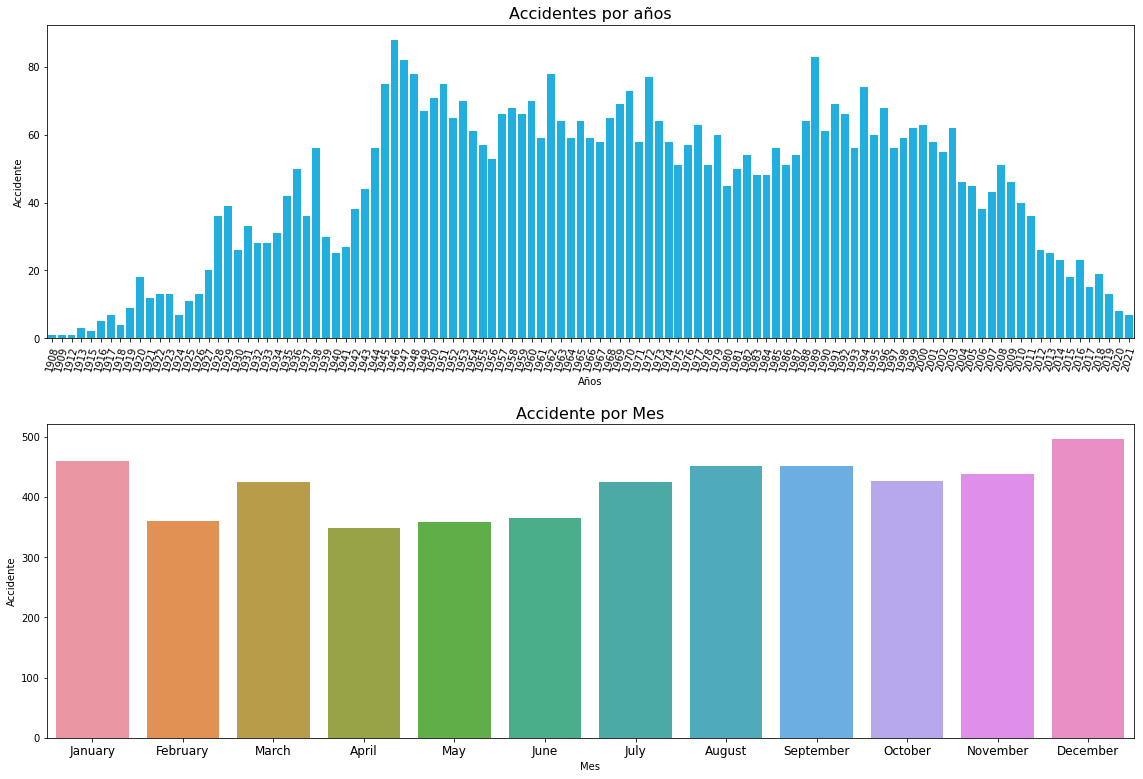

In [266]:
df_year = accidentes["Year"].value_counts().sort_index()
df_month = accidentes["Month"].value_counts().sort_index()

figure = plt.figure(figsize=(16,16))
axis1 = figure.add_subplot(3,1,1)
sns.barplot(x=df_year.index,y=df_year.values,ax=axis1,color='deepskyblue')
axis1.set(ylabel="Accidente",xlabel="Años")
axis1.set_title("Accidentes por años",fontsize=16)
axis1.set_xticklabels(df_year.index,rotation=75,fontsize=10)


axis2 = figure.add_subplot(3,1,2)
sns.barplot(x=df_month.index,y=df_month.values,ax=axis2)
axis2.set(ylabel="Accidente",xlabel="Mes")
axis2.set_title("Accidente por Mes",fontsize=16)
axis2.set_xticklabels(months,fontsize=12)


plt.tight_layout(w_pad=4, h_pad=2)
plt.show()

Notamos que en el año 1946 sucedieron la mayor cantidad de accidentes, posiblemente por la post guerra mundial, además se observa que a partir del año 2000 un descenso de los accidentes.

---
Además notamos que en el mes de Diciembre, sucedieron la mayor cantidad de siniestros.



## Número total de personas a bordo del vuelo, número de personas que sobrevivieron en el vuelo y muertes ocurridas.

In [267]:
# calculating the number of survivors
accidentes["Survivors"] = accidentes["total_a_bordo"] - accidentes["total_fallecidos"]
# calculating the total number of survived and fatalaties for each year
aboard_fatalities = accidentes.pivot_table(values=["total_fallecidos","Survivors"],index="Year",aggfunc=np.sum)
aboard_fatalities.head()

,Survivors,total_fallecidos
Year,,
1908,1.0,1.0
1909,0.0,1.0
1912,0.0,5.0
1913,6.0,43.0
1915,24.0,36.0


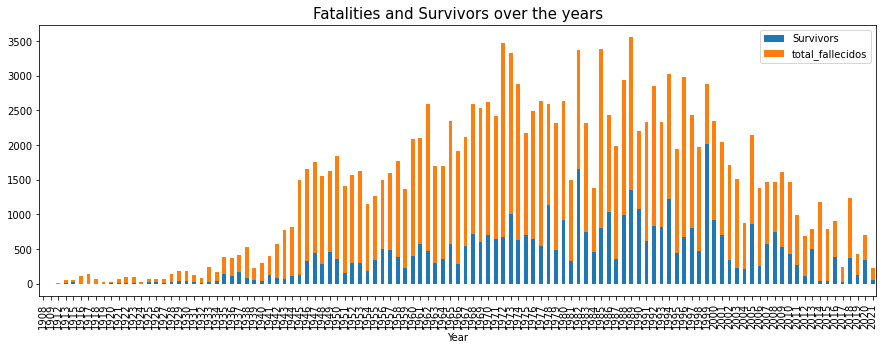

In [268]:
figure = plt.figure(figsize=(15,5))
axis = figure.add_subplot(1,1,1)
aboard_fatalities.plot(kind="bar",stacked=True,ax=axis)
plt.title("Fatalities and Survivors over the years",fontsize=15)
axis1.set_xticklabels(aboard_fatalities,fontsize=12)
plt.show()

Notamos que la tendencia en cada siniestro, es que haya mas fallecidos que sobrevivientes.

In [269]:
accidentes['hora'] = accidentes['hora'].str.replace('c: ', '')
accidentes['hora'] = accidentes['hora'].str.replace('c:', '')
accidentes['hora'] = accidentes['hora'].str.replace('c', '')
accidentes['hora'] = accidentes['hora'].str.replace('12\'20', '12:20')
accidentes['hora'] = accidentes['hora'].str.replace('18.40', '18:40')
accidentes['hora'] = accidentes['hora'].str.replace('0943', '09:43')
accidentes['hora'] = accidentes['hora'].str.replace('22\'08', '22:08')
accidentes['hora'] = accidentes['hora'].str.replace('114:20', '00:00')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


# Dividimos tipo de vuelo

In [270]:
import random

In [271]:
accidentes['operador'] = accidentes.operador.astype('str')

In [272]:
# define flight type
accidentes['flight_type'] = 'unknown' 
accidentes.loc[(accidentes['operador'].str.contains('Military')),'flight_type'] = 'military'
accidentes.loc[(accidentes['operador'] == 'Private'),'flight_type'] = 'others'
accidentes.loc[(accidentes['operador'] == 'US Aerial Mail Service'), 'flight_type'] = 'others'

In [273]:
# check for other types of flight types randomly.
vals = accidentes[(accidentes['operador'].str.contains('Air')) & (accidentes.flight_type == 'unknown')].operador
random_values = random.sample(set(vals), 200)
random_values[:5] # we look at 200 random entries

['Lumbini Airways',
 'Orient Air System and Integrated Services',
 'Mercer Airlines',
 'China Eastern Airlines',
 'National Air Transport']

In [274]:
# Asignamos todos los tipos "Unknown a comercial"
accidentes.loc[accidentes['flight_type'] == 'unknown','flight_type'] = 'commercial'
data_comm = accidentes[accidentes.flight_type == 'commercial']
data_comm.head()

,index,fecha,hora,ruta,operador,vuelo_nro,recorrido,tipo_avion,registro,total_a_bordo,...,tripulacion_fallecidos,fallecidos_en_tierra,resumen,anio,Decadas,Year,Month,Day,Survivors,flight_type
1,1,1909-09-07,0,"Juvisy-sur-Orge, France",0,0,Air show,Wright Byplane,SC1,1.0,...,0.0,0,Eugene Lefebvre was the first pilot to ever be...,1909,1900-1920,1909,9,7,0.0,commercial
17,17,1917-06-17,0,"Near Yarmouth, England",0,0,0,Zepplin L-48 (air ship),L-48,16.0,...,0.0,0,Shot down by aircraft.,1917,1900-1920,1917,6,17,2.0,commercial
26,26,1919-07-21,1655,"Chicago, Illinois",Wingfoot Air Express Goodyear Tire,0,Shuttle,FD Type Dirigible,0,0.0,...,1.0,10,"The dirigible, cruising at 1,200 ft. caught fi...",1919,1900-1920,1919,7,21,-3.0,commercial
27,27,1919-08-02,0,"Verona, Italy",Caproni Company,0,Venice Taliedo,Caproni Ca.48,0,14.0,...,2.0,0,As the plane was passing over Verona the wings...,1919,1900-1920,1919,8,2,0.0,commercial
28,28,1919-10-02,0,"Newcastle, England",Aircraft Transport and Travel,0,0,De Havilland DH-4,0,1.0,...,1.0,0,0,1919,1900-1920,1919,10,2,0.0,commercial


In [275]:
def plot_fatal(df, begin=1909, end=2021):
    """
    Plot number of passenger fatalities on aircrafts.
    """
    df_tmp = accidentes[['Year','total_fallecidos']].copy()
    plt.figure(figsize=(20, 6))
    plt.plot(df_tmp.groupby('Year').sum())
    plt.title(f'Fatalities per year ({begin}-{end})')
    plt.xlabel('Year')
    plt.ylabel('Fatalities')
    plt.xlim([begin, end])

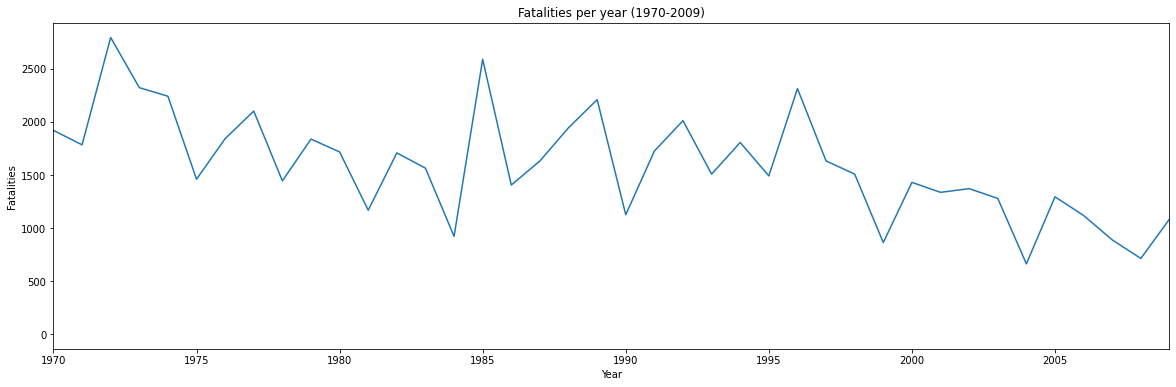

In [276]:
# fatalities from 1970
plot_fatal(data_comm,1970,2009)

Observamos que la cantidad de muertes va decreciendo al correr los años.

In [277]:
def plot_passenger(df):
    """
    Plots number of passengers on airplanes from 1970 to 2009
    """
    plt.figure(figsize=(14, 10))
    plt.plot(df)
    plt.xticks(rotation=70)
    plt.show()    
    

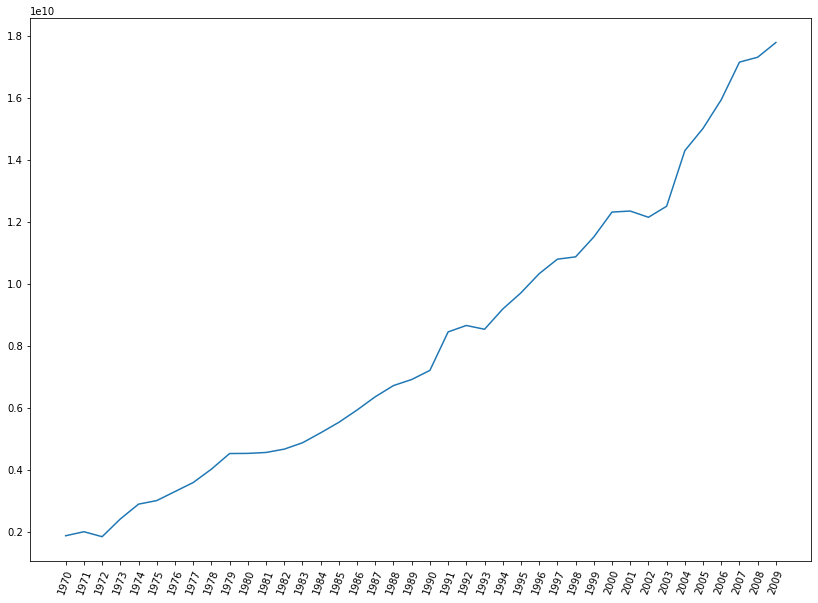

In [278]:
plot_passenger(wb_data)

Observamos un crecimiento exponencial de personas que viajan en avión

In [279]:
# Checamos la correlacion entre los dos datasets
# preparamos los datos para el analisis de correlacion
## preparamos total_fallecidos
df_tmp = data_comm[['Year','total_fallecidos']].copy()
df_tmp = df_tmp.groupby('Year', as_index=False).sum()
df_tmp['Year'] = df_tmp.Year.astype('str')

## preparamos los datos de pasajeros del banco mundial
wb_tmp = wb_data.copy()
wb_tmp['Year'] = wb_tmp.index.astype('str')
wb_tmp.reset_index(inplace=True)
wb_tmp = wb_tmp.drop(['index'],axis=1)

## unimos 
df = pd.merge(wb_tmp, df_tmp, how='left', on='Year')
df = df[['Year','passengers','total_fallecidos']]

# buscamos la correlación
df['passengers'].corr(df['total_fallecidos'])

-0.6012377737871553

Están correlacionadas negativamente.

  Significa que a medida que el número de pasajeros siga aumentando, veremos que el número de muertes seguirá disminuyendo.

  observamos la cantidad de pasajeros que ha estado viajando a lo largo de los años desde 1970, para ver si existe una correlación entre la cantidad de pasajeros que viajan y la cantidad de muertes registradas. Descubrimos que existe una correlación negativa entre los 2 registros, lo que significa que a medida que la cantidad de pasajeros sigue aumentando, esperamos ver una disminución en la cantidad de muertes.
  Llegamos a la conclusión que es mas seguro viajar en avi{on hoy en d{ia.